In [3]:
# Import necessary libraries
import pandas as pd
import pingouin as pg

# Load the CSV data into a DataFrame
df = pd.read_csv('data1.csv')

# Calculate Cronbach's Alpha
alpha = pg.cronbach_alpha(data=df)
cronbach_alpha_value = alpha[0]

# Generate a report
report = f"""
Reliability and Validity Report

Cronbach's Alpha Coefficient: {cronbach_alpha_value:.3f}

Interpretation:
A Cronbach's alpha value closer to 1 indicates higher internal consistency and reliability of the questionnaire.
Typically, a value above 0.7 is considered acceptable for research purposes.
"""

# Print the report
print(report)


AssertionError: All columns must be numeric.

In [5]:
import pandas as pd
import numpy as np

# Load the CSV data into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns: ", non_numeric_columns)

# Example mapping for the 'Familiarity' column
familiarity_mapping = {
    'Not familiar at all': 1,
    'Somewhat familiar': 2,
    'Moderately familiar': 3,
    'Very familiar': 4,
    'Extremely familiar': 5
}

# Apply the mapping (if necessary)
if 'Familiarity' in df.columns:
    df['Familiarity'] = df['Familiarity'].map(familiarity_mapping)

# Re-check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns after conversion: ", non_numeric_columns)

# Remove or convert remaining non-numeric columns (if any)
df = df.drop(columns=non_numeric_columns)

# Verify the data types to ensure all columns are numeric
data_types = df.dtypes
print(data_types)

# Calculate Cronbach's Alpha manually
def cronbach_alpha(df):
    df = df.dropna(axis=0)  # Drop any rows with missing values
    item_scores = df.values.T
    item_variances = np.var(item_scores, axis=1, ddof=1)
    total_score_variance = np.var(np.sum(item_scores, axis=0), ddof=1)
    n_items = len(item_scores)
    alpha = n_items / (n_items - 1) * (1 - np.sum(item_variances) / total_score_variance)
    return alpha

# Calculate Cronbach's Alpha
cronbach_alpha_value = cronbach_alpha(df)

# Generate a report
report = f"""
Reliability and Validity Report

Cronbach's Alpha Coefficient: {cronbach_alpha_value:.3f}

Interpretation:
A Cronbach's alpha value closer to 1 indicates higher internal consistency and reliability of the questionnaire.
Typically, a value above 0.7 is considered acceptable for research purposes.
"""

report, data_types


Non-numeric columns:  Index(['Timestamp', 'Name', 'Gender', 'Organization Name',
       'What is your current job role?',
       'How many years of experience do you have in your current field?',
       'What is the size of your organization',
       'In which geographic region is your organization located?',
       'Which domain do you work in?',
       'If yes, which AI technologies has your organization adopted? (Select all that apply)',
       'Have you observed any challenges or barriers to AI adoption within your organization? (Select all that apply)',
       'How would you describe the overall level of AI maturity within your organization?',
       'How do you perceive the impact of AI adoption on job roles and workforce dynamics within your organization? ',
       'What factors do you believe are most critical for ensuring the successful adoption and implementation of AI technologies within organizations?',
       'Have you noticed any specific areas where AI adoption has led t

("\nReliability and Validity Report\n\nCronbach's Alpha Coefficient: 0.888\n\nInterpretation:\nA Cronbach's alpha value closer to 1 indicates higher internal consistency and reliability of the questionnaire.\nTypically, a value above 0.7 is considered acceptable for research purposes.\n",
 How familiar are you with artificial intelligence (AI) technologies?                                                              float64
 Has your organization adopted AI technologies in its operations?                                                                  float64
 How would you rate the impact of AI adoption on your organization's operational efficiency?                                       float64
 To what extent has AI adoption influenced your organization's decision-making processes?                                          float64
 In your opinion, how has AI adoption affected your organization's competitive advantage?                                          float64
 How satisfied 

In [6]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Example mapping for the 'Familiarity' column (if necessary)
familiarity_mapping = {
    'Not familiar at all': 1,
    'Somewhat familiar': 2,
    'Moderately familiar': 3,
    'Very familiar': 4,
    'Extremely familiar': 5
}

# Apply the mapping (if necessary)
if 'Familiarity' in df.columns:
    df['Familiarity'] = df['Familiarity'].map(familiarity_mapping)

# Remove any non-numeric columns that might still exist
df = df.select_dtypes(include=[np.number])

# Conduct KMO test
kmo_all, kmo_model = calculate_kmo(df)

# Conduct Bartlett’s test
chi_square_value, p_value = calculate_bartlett_sphericity(df)

# Conduct PCA with varimax rotation
fa = FactorAnalyzer(rotation='varimax', n_factors=5)
fa.fit(df)

# Get eigenvalues
ev, v = fa.get_eigenvalues()

# Create scree plot
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Display factor loadings
loadings = fa.loadings_
print("Factor Loadings:\n", loadings)

# Output the KMO and Bartlett's test results
kmo_result = f"""
Kaiser-Meyer-Olkin Measure of Sampling Adequacy: {kmo_model:.3f}
"""
bartlett_result = f"""
Bartlett's Test of Sphericity
Approx. Chi-Square: {chi_square_value:.3f}
df: {df.shape[1] * (df.shape[1] - 1) / 2}
Sig.: {p_value:.3f}
"""

print(kmo_result)
print(bartlett_result)


C:\Users\lenovo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


LinAlgError: SVD did not converge

In [7]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'data1.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Example mapping for the 'Familiarity' column (if necessary)
familiarity_mapping = {
    'Not familiar at all': 1,
    'Somewhat familiar': 2,
    'Moderately familiar': 3,
    'Very familiar': 4,
    'Extremely familiar': 5
}

# Apply the mapping (if necessary)
if 'How familiar are you with artificial intelligence (AI) technologies?' in df.columns:
    df['How familiar are you with artificial intelligence (AI) technologies?'] = df['How familiar are you with artificial intelligence (AI) technologies?'].map(familiarity_mapping)


In [8]:
# Handle missing values by filling them with the column mean
df.fillna(df.mean(), inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10716\350272611.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [9]:
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])

# Check for multicollinearity
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features with high multicollinearity
df.drop(columns=to_drop, inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10716\595746560.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [10]:
# Conduct KMO test
kmo_all, kmo_model = calculate_kmo(df)

# Conduct Bartlett’s test
chi_square_value, p_value = calculate_bartlett_sphericity(df)

# Output the KMO and Bartlett's test results
print(f"Kaiser-Meyer-Olkin Measure of Sampling Adequacy: {kmo_model:.3f}")
print(f"Bartlett's Test of Sphericity\nApprox. Chi-Square: {chi_square_value:.3f}\ndf: {df.shape[1] * (df.shape[1] - 1) / 2}\nSig.: {p_value:.3f}")


C:\Users\lenovo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


LinAlgError: SVD did not converge

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Analyze socio-demographic characteristics
num_respondents = len(df)
age_distribution = df['Age'].value_counts()
gender_distribution = df['Gender'].value_counts()

# Visualize the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.bar(gender_distribution.index, gender_distribution.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


            Timestamp                  Name  Gender  \
0    4/8/2024 6:42:47  Govindaraj Munuswamy    Male   
1    4/8/2024 7:22:10   Kumaran Rajendhiran    Male   
2    4/9/2024 9:26:30               VAIDIK     Male   
3  4/11/2024 11:10:42                Manasi  Female   
4   5/27/2024 2:37:38           Kaviya Ravi  Female   

                Organization Name What is your current job role?  \
0        FIRSTSOURCE SOLUTION LTD           Executive/Managerial   
1                         airt.ai         Professional/Technical   
2                      Cognizant          Professional/Technical   
3                       Accenture          Operations/Production   
4  Cognizant Technology Solutions                      Associate   

  How many years of experience do you have in your current field?  \
0                                 More than 20 years                
1                                         6-10 years                
2                                          1-5 years 

KeyError: 'Age'

            Timestamp                  Name  Gender  \
0    4/8/2024 6:42:47  Govindaraj Munuswamy    Male   
1    4/8/2024 7:22:10   Kumaran Rajendhiran    Male   
2    4/9/2024 9:26:30               VAIDIK     Male   
3  4/11/2024 11:10:42                Manasi  Female   
4   5/27/2024 2:37:38           Kaviya Ravi  Female   

                Organization Name What is your current job role?  \
0        FIRSTSOURCE SOLUTION LTD           Executive/Managerial   
1                         airt.ai         Professional/Technical   
2                      Cognizant          Professional/Technical   
3                       Accenture          Operations/Production   
4  Cognizant Technology Solutions                      Associate   

  How many years of experience do you have in your current field?  \
0                                 More than 20 years                
1                                         6-10 years                
2                                          1-5 years 

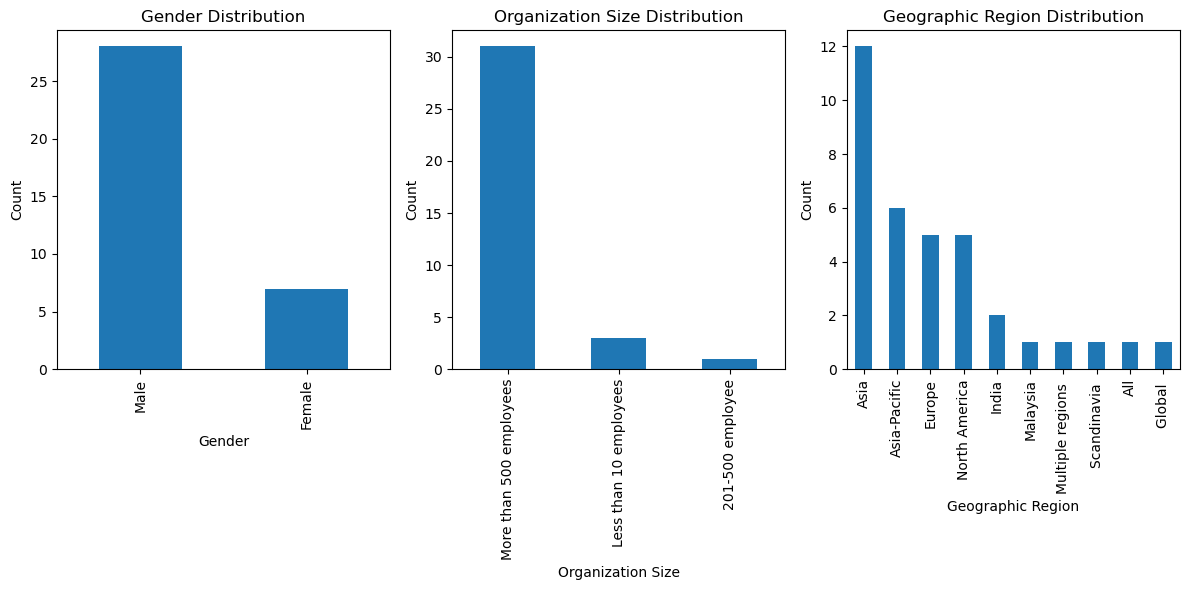

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Analyze socio-demographic characteristics
num_respondents = len(df)
gender_distribution = df['Gender'].value_counts()
organization_size_distribution = df['What is the size of your organization'].value_counts()
geographic_region_distribution = df['In which geographic region is your organization located?'].value_counts()

# Visualize the data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
gender_distribution.plot(kind='bar', ax=plt.gca())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
organization_size_distribution.plot(kind='bar', ax=plt.gca())
plt.xlabel('Organization Size')
plt.ylabel('Count')
plt.title('Organization Size Distribution')

plt.subplot(1, 3, 3)
geographic_region_distribution.plot(kind='bar', ax=plt.gca())
plt.xlabel('Geographic Region')
plt.ylabel('Count')
plt.title('Geographic Region Distribution')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Select numerical columns for descriptive statistics
numerical_cols = ['How many years of experience do you have in your current field?',
                  'How would you rate the impact of AI adoption on your organization\'s operational efficiency?',
                  'To what extent has AI adoption influenced your organization\'s decision-making processes?',
                  'How many years of experience do you have in your current field?',
    'How familiar are you with artificial intelligence (AI) technologies?',
    'How would you rate the impact of AI adoption on your organization\'s operational efficiency?',
    'To what extent has AI adoption influenced your organization\'s decision-making processes?',
    'How satisfied are you with the outcomes of AI adoption in your organization?',
    'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?',
    'To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?',
    'How would you describe the overall level of AI maturity within your organization?',
    'How likely are you to recommend AI adoption to other organizations within your industry?'
                  # Add more numerical columns as needed
                  ]

# Calculate descriptive statistics
desc_stats = df[numerical_cols].describe()

# Display the descriptive statistics
print(desc_stats)


       How would you rate the impact of AI adoption on your organization's operational efficiency?  \
count                                          33.000000                                             
mean                                            3.363636                                             
std                                             0.962360                                             
min                                             1.000000                                             
25%                                             3.000000                                             
50%                                             3.000000                                             
75%                                             4.000000                                             
max                                             5.000000                                             

       To what extent has AI adoption influenced your organization's decision-mak

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Select numerical columns for descriptive statistics
numerical_cols = [
    'How many years of experience do you have in your current field?',
    'How familiar are you with artificial intelligence (AI) technologies?',
    'How would you rate the impact of AI adoption on your organization\'s operational efficiency?',
    'To what extent has AI adoption influenced your organization\'s decision-making processes?',
    'How satisfied are you with the outcomes of AI adoption in your organization?',
    'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?',
    'To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?',
    'How would you describe the overall level of AI maturity within your organization?',
    'How likely are you to recommend AI adoption to other organizations within your industry?'
]

# Calculate descriptive statistics
desc_stats = df[numerical_cols].describe()

# Display the descriptive statistics in tabular format
print(desc_stats.to_string())


       How familiar are you with artificial intelligence (AI) technologies?  How would you rate the impact of AI adoption on your organization's operational efficiency?  To what extent has AI adoption influenced your organization's decision-making processes?  How satisfied are you with the outcomes of AI adoption in your organization?  How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?  To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?  How likely are you to recommend AI adoption to other organizations within your industry?
count                                                             33.000000                                                                                    33.000000                                                                                 33.000000                                                                     3

In [15]:
import pandas as pd
from tabulate import tabulate

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Select numerical columns for descriptive statistics
numerical_cols = [
    'How many years of experience do you have in your current field?',
    'How familiar are you with artificial intelligence (AI) technologies?',
    'How would you rate the impact of AI adoption on your organization\'s operational efficiency?',
    'To what extent has AI adoption influenced your organization\'s decision-making processes?',
    'How satisfied are you with the outcomes of AI adoption in your organization?',
    'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?',
    'To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?',
    'How would you describe the overall level of AI maturity within your organization?',
    'How likely are you to recommend AI adoption to other organizations within your industry?'
]

# Calculate descriptive statistics
desc_stats = df[numerical_cols].describe()

# Print the descriptive statistics in a tabular format
print(tabulate(desc_stats, headers='keys', tablefmt='grid'))


+-------+------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------+
|       |   How familiar are you with artificial intelligence (AI) technologies? |   How would you rate the impact of AI adoption on your organization's operational efficiency? |   To what extent has AI adoption influenced your organization's decision-making processes? |   How satisfied are you with th

In [16]:
from tabulate import tabulate
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Select numerical columns for descriptive statistics
numerical_cols = [
    'How many years of experience do you have in your current field?',
    'How familiar are you with artificial intelligence (AI) technologies?',
    'How would you rate the impact of AI adoption on your organization\'s operational efficiency?',
    'To what extent has AI adoption influenced your organization\'s decision-making processes?',
    'How satisfied are you with the outcomes of AI adoption in your organization?',
    'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?',
    'To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?',
    'How would you describe the overall level of AI maturity within your organization?',
    'How likely are you to recommend AI adoption to other organizations within your industry?'
]

# Calculate descriptive statistics
desc_stats = df[numerical_cols].describe()

# Print the output in tabular format with a margin
print(tabulate(desc_stats, headers='keys', tablefmt='fancy_grid', numalign='right', stralign='right', showindex=True, colalign=("center",)))


╒═══════╤════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════╕
│       │   How familiar are you with artificial intelligence (AI) technologies? │   How would you rate the impact of AI adoption on your organization's operational efficiency? │   To what extent has AI adoption influenced your organization's decision-making processes? │   How satisfied are you with th

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10716\380545184.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[numerical_cols].corr()


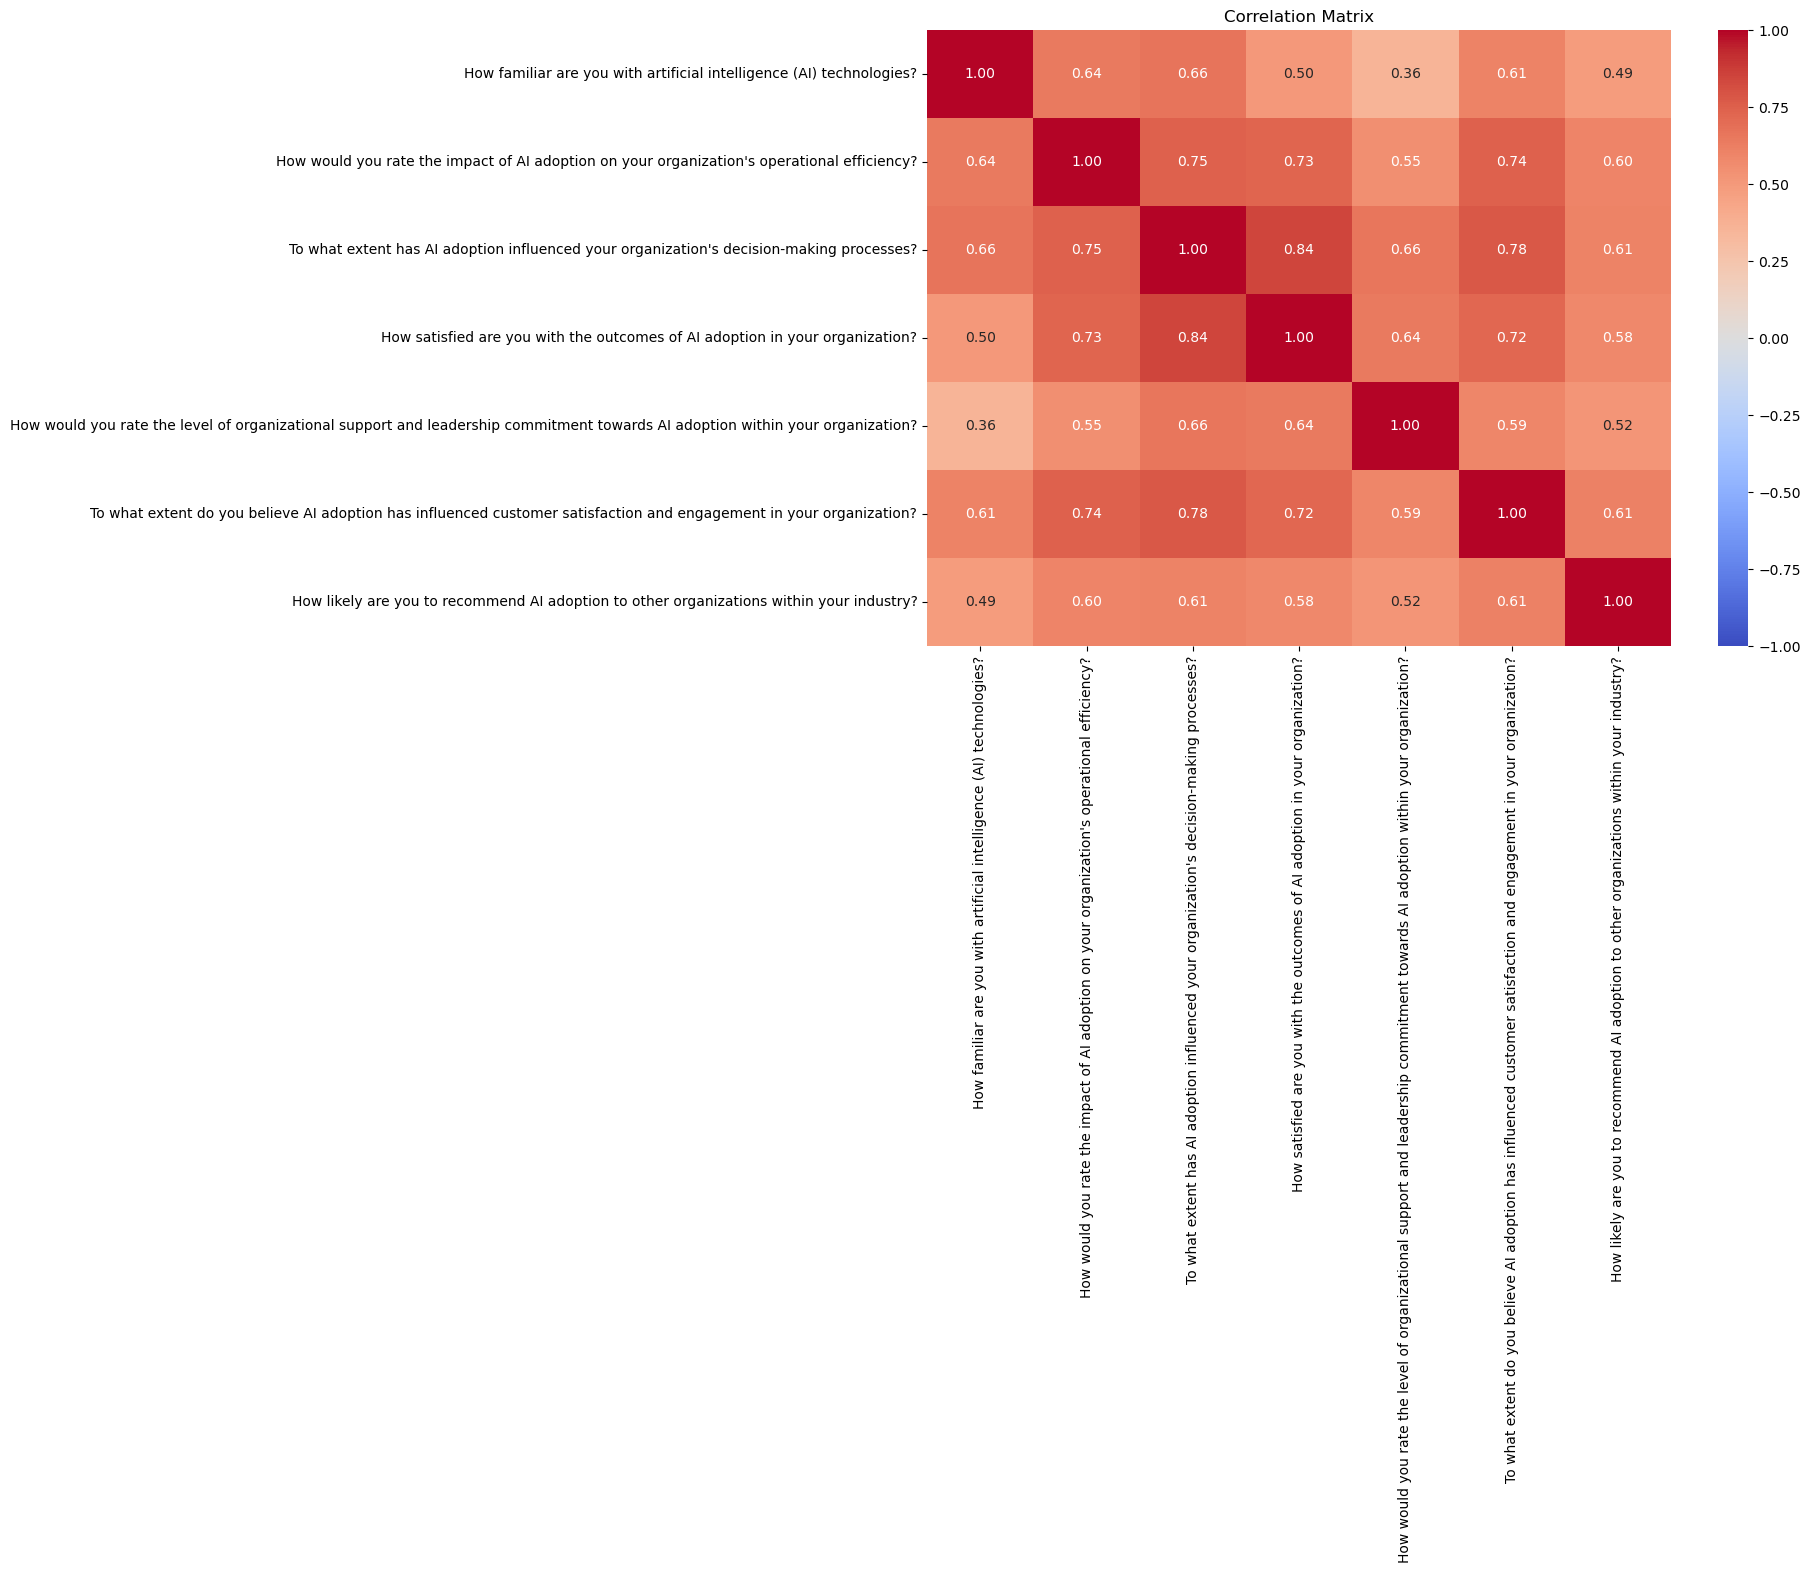

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('data1.csv')

# Select numerical columns for correlation analysis
numerical_cols = [
    'How many years of experience do you have in your current field?',
    'How familiar are you with artificial intelligence (AI) technologies?',
    'How would you rate the impact of AI adoption on your organization\'s operational efficiency?',
    'To what extent has AI adoption influenced your organization\'s decision-making processes?',
    'How satisfied are you with the outcomes of AI adoption in your organization?',
    'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?',
    'To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?',
    'How would you describe the overall level of AI maturity within your organization?',
    'How likely are you to recommend AI adoption to other organizations within your industry?'
]

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


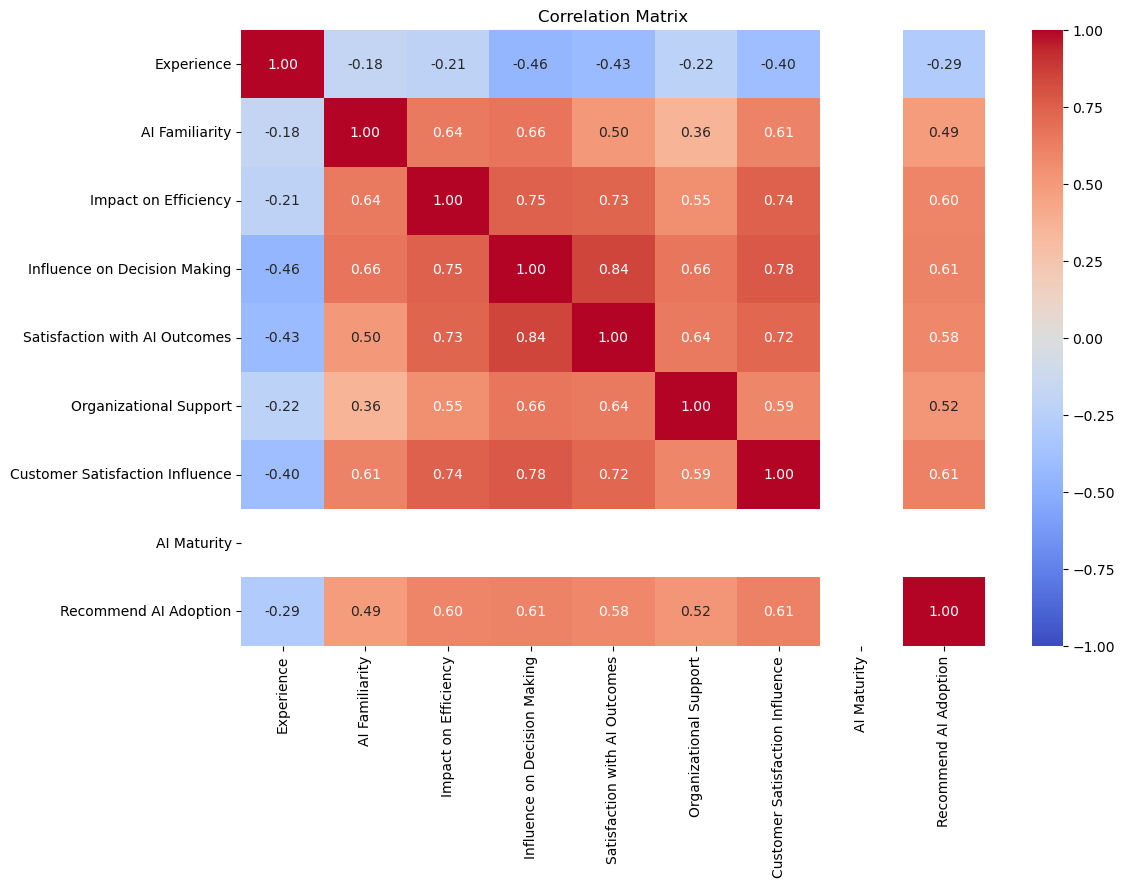

,Experience,AI Familiarity,Impact on Efficiency,Influence on Decision Making,Satisfaction with AI Outcomes,Organizational Support,Customer Satisfaction Influence,AI Maturity,Recommend AI Adoption
Experience,1.000000,-0.175650,-0.214129,-0.460537,-0.425826,-0.223931,-0.404003,NaN,-0.293204
AI Familiarity,-0.175650,1.000000,0.641124,0.664174,0.503062,0.356640,0.608674,NaN,0.491185
Impact on Efficiency,-0.214129,0.641124,1.000000,0.746338,0.730360,0.554229,0.744207,NaN,0.597566
Influence on Decision Making,-0.460537,0.664174,0.746338,1.000000,0.844050,0.658752,0.780641,NaN,0.608397
Satisfaction with AI Outcomes,-0.425826,0.503062,0.730360,0.844050,1.000000,0.643709,0.723091,NaN,0.581218
Organizational Support,-0.223931,0.356640,0.554229,0.658752,0.643709,1.000000,0.590662,NaN,0.516100
Customer Satisfaction Influence,-0.404003,0.608674,0.744207,0.780641,0.723091,0.590662,1.000000,NaN,0.614518
AI Maturity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recommend AI Adoption,-0.293204,0.491185,0.597566,0.608397,0.581218,0.516100,0.614518,NaN,1.000000


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for correlation analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

corr_matrix


In [4]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols].dropna()

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numerical)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(fa.n_components)])

# Display the factor loadings
factor_loadings


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by StandardScaler.

In [5]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Check for missing values
missing_values = df_numerical.isnull().sum()

# Display missing values
print("Missing values in each column:\n", missing_values)

# Fill missing values with the mean of each column
df_numerical_filled = df_numerical.fillna(df_numerical.mean())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numerical_filled)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(fa.n_components_)])
factor_loadings


Missing values in each column:
 Experience                          29
AI Familiarity                      90
Impact on Efficiency                90
Influence on Decision Making        90
Satisfaction with AI Outcomes       90
Organizational Support              90
Customer Satisfaction Influence     90
AI Maturity                        123
Recommend AI Adoption               90
dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
FactorAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [6]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Check for missing values
missing_values = df_numerical.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the mean of each column
df_numerical_filled = df_numerical.fillna(df_numerical.mean())

# Verify there are no more missing values
print("Missing values after filling:\n", df_numerical_filled.isnull().sum())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numerical_filled)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(fa.n_components_)])
factor_loadings


Missing values in each column:
 Experience                          29
AI Familiarity                      90
Impact on Efficiency                90
Influence on Decision Making        90
Satisfaction with AI Outcomes       90
Organizational Support              90
Customer Satisfaction Influence     90
AI Maturity                        123
Recommend AI Adoption               90
dtype: int64
Missing values after filling:
 Experience                           0
AI Familiarity                       0
Impact on Efficiency                 0
Influence on Decision Making         0
Satisfaction with AI Outcomes        0
Organizational Support               0
Customer Satisfaction Influence      0
AI Maturity                        123
Recommend AI Adoption                0
dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
FactorAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Check for missing values
missing_values = df_numerical.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the mean of each column
df_numerical_filled = df_numerical.fillna(df_numerical.mean())

# Verify there are no more missing values
print("Missing values after filling:\n", df_numerical_filled.isnull().sum())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numerical_filled)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(fa.n_components_)])
factor_loadings


Missing values in each column:
 Experience                          29
AI Familiarity                      90
Impact on Efficiency                90
Influence on Decision Making        90
Satisfaction with AI Outcomes       90
Organizational Support              90
Customer Satisfaction Influence     90
AI Maturity                        123
Recommend AI Adoption               90
dtype: int64
Missing values after filling:
 Experience                           0
AI Familiarity                       0
Impact on Efficiency                 0
Influence on Decision Making         0
Satisfaction with AI Outcomes        0
Organizational Support               0
Customer Satisfaction Influence      0
AI Maturity                        123
Recommend AI Adoption                0
dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
FactorAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Drop rows with any NaN values
df_numerical_dropped = df_numerical.dropna()

# Verify there are no more missing values
print("Missing values after dropping rows:\n", df_numerical_dropped.isnull().sum())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_numerical_dropped)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(fa.n_components_)])
factor_loadings


Missing values after dropping rows:
 Experience                         0.0
AI Familiarity                     0.0
Impact on Efficiency               0.0
Influence on Decision Making       0.0
Satisfaction with AI Outcomes      0.0
Organizational Support             0.0
Customer Satisfaction Influence    0.0
AI Maturity                        0.0
Recommend AI Adoption              0.0
dtype: float64


ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required by StandardScaler.

In [9]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df_numerical)

# Verify there are no more missing values
print("Missing values after imputation:\n", pd.DataFrame(df_imputed, columns=numerical_cols).isnull().sum())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(fa.n_components_)])
factor_loadings


ValueError: Shape of passed values is (123, 8), indices imply (123, 9)

In [10]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['AI Maturity'] = pd.to_numeric(df['How would you describe the overall level of AI maturity within your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'AI Maturity',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Check for columns with all NaN values
all_nan_columns = df_numerical.columns[df_numerical.isna().all()].tolist()
print(f"Columns with all NaN values: {all_nan_columns}")

# Drop columns with all NaN values
df_numerical_dropped = df_numerical.drop(columns=all_nan_columns)

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df_numerical_dropped)

# Verify there are no more missing values
print("Missing values after imputation:\n", pd.DataFrame(df_imputed, columns=df_numerical_dropped.columns).isnull().sum())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Perform Factor Analysis
fa = FactorAnalysis(n_components=5, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=df_numerical_dropped.columns, columns=[f'Factor {i+1}' for i in range(fa.n_components_)])
factor_loadings


Columns with all NaN values: ['AI Maturity']
Missing values after imputation:
 Experience                         0
AI Familiarity                     0
Impact on Efficiency               0
Influence on Decision Making       0
Satisfaction with AI Outcomes      0
Organizational Support             0
Customer Satisfaction Influence    0
Recommend AI Adoption              0
dtype: int64


AttributeError: 'FactorAnalysis' object has no attribute 'n_components_'

In [11]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Map experience levels to numerical values
experience_mapping = {
    'Less than 1 year': 0.5,
    '1-5 years': 3,
    '6-10 years': 8,
    '11-15 years': 13,
    '16-20 years': 18,
    'More than 20 years': 25
}
df['Experience'] = df['How many years of experience do you have in your current field?'].map(experience_mapping)

# Convert other relevant columns to numerical values
df['AI Familiarity'] = pd.to_numeric(df['How familiar are you with artificial intelligence (AI) technologies?'], errors='coerce')
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')
df['Influence on Decision Making'] = pd.to_numeric(df['To what extent has AI adoption influenced your organization\'s decision-making processes?'], errors='coerce')
df['Satisfaction with AI Outcomes'] = pd.to_numeric(df['How satisfied are you with the outcomes of AI adoption in your organization?'], errors='coerce')
df['Organizational Support'] = pd.to_numeric(df['How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?'], errors='coerce')
df['Customer Satisfaction Influence'] = pd.to_numeric(df['To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?'], errors='coerce')
df['Recommend AI Adoption'] = pd.to_numeric(df['How likely are you to recommend AI adoption to other organizations within your industry?'], errors='coerce')

# Select numerical columns for factor analysis
numerical_cols = [
    'Experience',
    'AI Familiarity',
    'Impact on Efficiency',
    'Influence on Decision Making',
    'Satisfaction with AI Outcomes',
    'Organizational Support',
    'Customer Satisfaction Influence',
    'Recommend AI Adoption'
]

# Filter the DataFrame to include only the numerical columns
df_numerical = df[numerical_cols]

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df_numerical)

# Verify there are no more missing values
print("Missing values after imputation:\n", pd.DataFrame(df_imputed, columns=numerical_cols).isnull().sum())

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Perform Factor Analysis
n_components = 5
fa = FactorAnalysis(n_components=n_components, random_state=0)
fa.fit(df_standardized)

# Get the factor loadings
factor_loadings = pd.DataFrame(fa.components_.T, index=numerical_cols, columns=[f'Factor {i+1}' for i in range(n_components)])
factor_loadings


Missing values after imputation:
 Experience                         0
AI Familiarity                     0
Impact on Efficiency               0
Influence on Decision Making       0
Satisfaction with AI Outcomes      0
Organizational Support             0
Customer Satisfaction Influence    0
Recommend AI Adoption              0
dtype: int64


,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Experience,0.255923,0.458613,0.228226,0.213100,-0.420537
AI Familiarity,-0.703614,0.447134,-0.118814,-0.284636,-0.066237
Impact on Efficiency,-0.788619,0.372322,0.198691,0.123087,0.127391
Influence on Decision Making,-0.952482,-0.059047,-0.133654,0.051862,-0.046122
Satisfaction with AI Outcomes,-0.834413,-0.319996,0.056509,0.080555,-0.004432
Organizational Support,-0.657298,-0.358575,0.166590,0.054226,-0.127806
Customer Satisfaction Influence,-0.824940,0.165134,0.086437,0.031934,0.127453
Recommend AI Adoption,-0.645708,-0.296260,0.317784,-0.330047,-0.046698


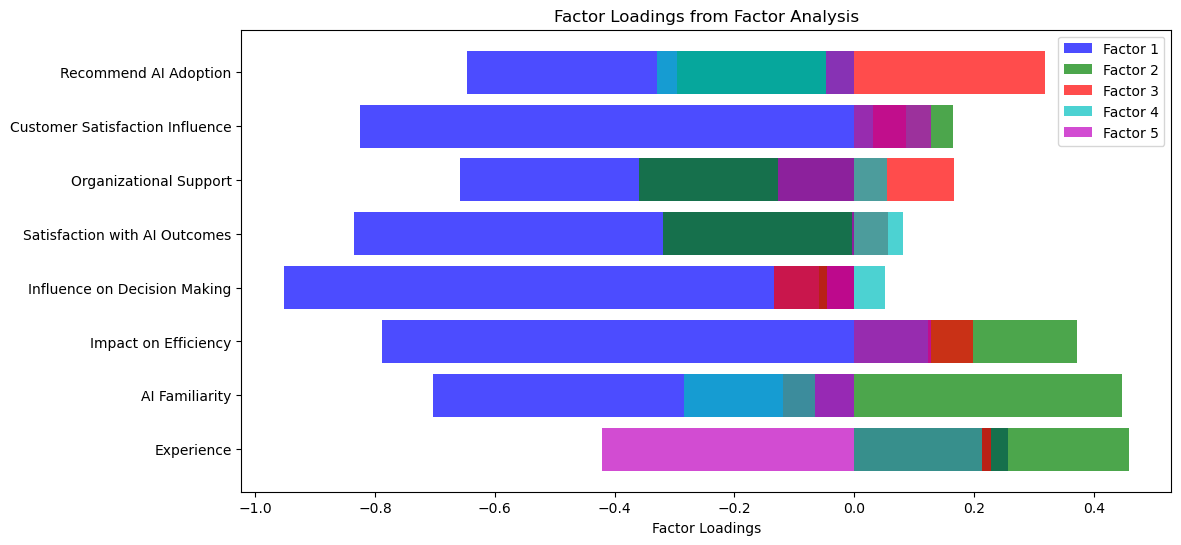

In [12]:
import matplotlib.pyplot as plt

# Plot the factor loadings
plt.figure(figsize=(12, 6))
plt.barh(factor_loadings.index, factor_loadings['Factor 1'], color='b', alpha=0.7, label='Factor 1')
plt.barh(factor_loadings.index, factor_loadings['Factor 2'], color='g', alpha=0.7, label='Factor 2')
plt.barh(factor_loadings.index, factor_loadings['Factor 3'], color='r', alpha=0.7, label='Factor 3')
plt.barh(factor_loadings.index, factor_loadings['Factor 4'], color='c', alpha=0.7, label='Factor 4')
plt.barh(factor_loadings.index, factor_loadings['Factor 5'], color='m', alpha=0.7, label='Factor 5')
plt.xlabel('Factor Loadings')
plt.title('Factor Loadings from Factor Analysis')
plt.legend()
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df['Experience'], df['Impact on Efficiency'], alpha=0.5)
plt.title('Experience vs. Impact on Efficiency')
plt.xlabel('Experience')
plt.ylabel('Impact on Efficiency')
plt.grid(True)
plt.show()


KeyError: 'Experience'

<Figure size 1200x600 with 0 Axes>

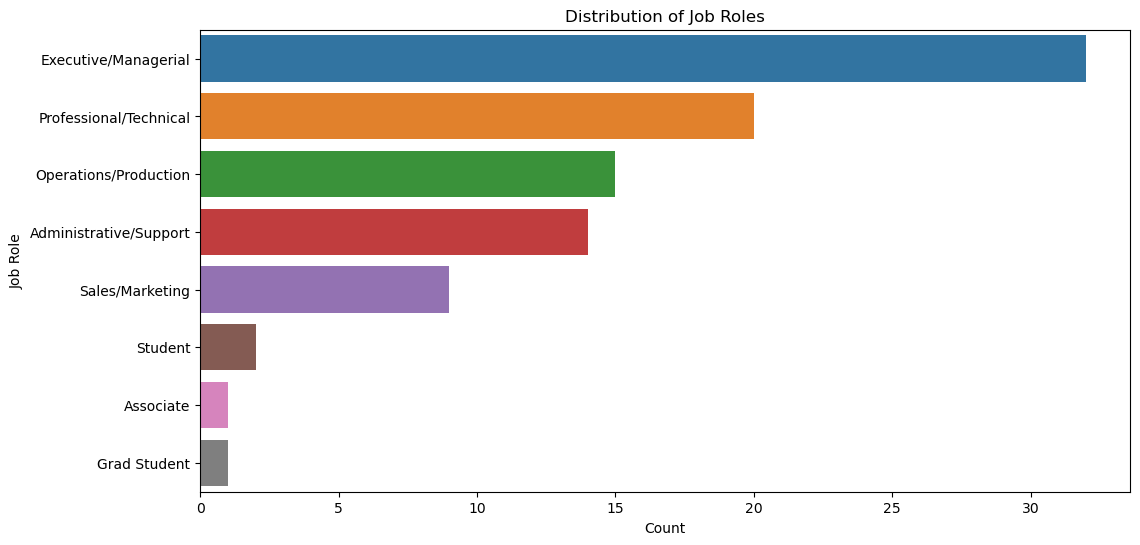

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1200x600 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Count plot of job roles
plt.figure(figsize=(12, 6))
sns.countplot(y='What is your current job role?', data=df, order=df['What is your current job role?'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.ylabel('Job Role')
plt.xlabel('Count')
plt.show()

# Box plot of impact of AI adoption on operational efficiency by job role
plt.figure(figsize=(12, 6))
sns.boxplot(x='How would you rate the impact of AI adoption on your organization\'s operational efficiency?', y='What is your current job role?', data=df)
plt.title('Impact of AI Adoption on Operational Efficiency by Job Role')
plt.xlabel('Rating')
plt.ylabel('Job Role')
plt.show()

# Bar plot of AI adoption challenges
challenges_columns = ['Have you observed any challenges or barriers to AI adoption within your organization? (Select all that apply)']
challenges = df[challenges_columns].stack().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=challenges.values, y=challenges.index, palette='viridis')
plt.title('Challenges to AI Adoption')
plt.xlabel('Count')
plt.ylabel('Challenges')
plt.show()


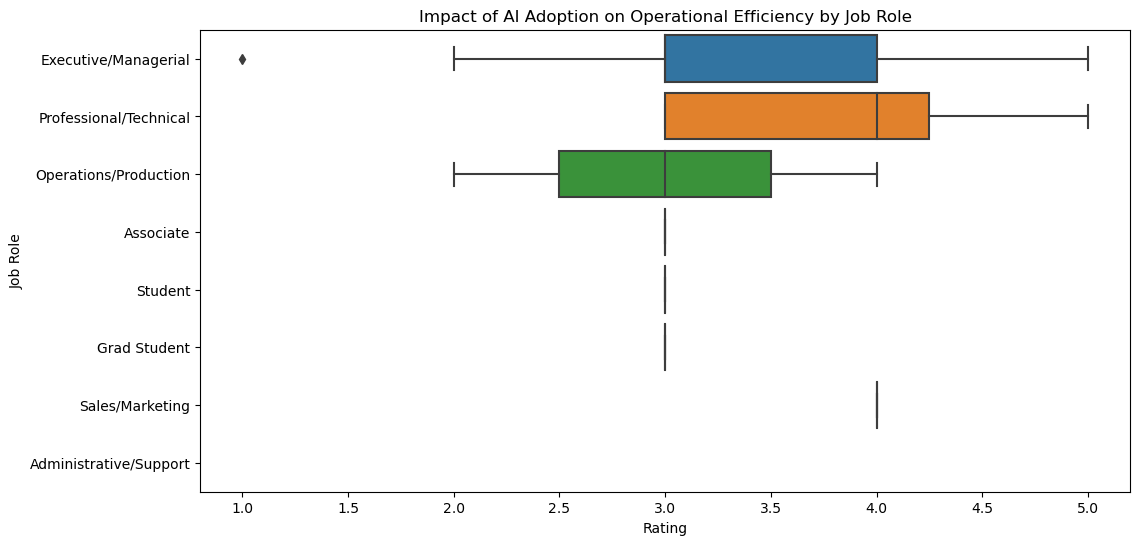

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Convert the 'How would you rate the impact of AI adoption on your organization's operational efficiency?' column to numeric
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')

# Box plot of impact of AI adoption on operational efficiency by job role
plt.figure(figsize=(12, 6))
sns.boxplot(x='Impact on Efficiency', y='What is your current job role?', data=df)
plt.title('Impact of AI Adoption on Operational Efficiency by Job Role')
plt.xlabel('Rating')
plt.ylabel('Job Role')
plt.show()


ValueError: Could not interpret input 'Impact on Efficiency'

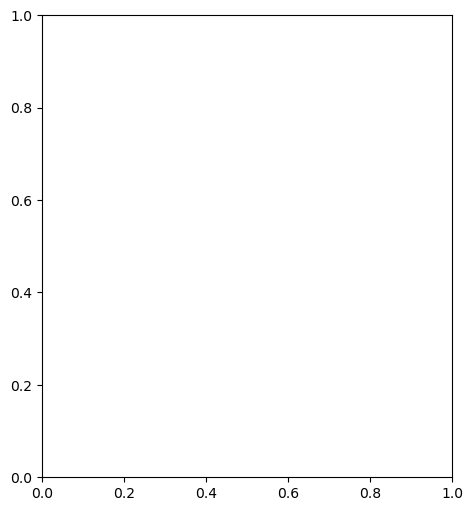

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for companies that have adopted AI technologies
adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'Yes']

# Filter the DataFrame for companies that have not adopted AI technologies
not_adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'No']

# Compare the business performance ratings of companies that have adopted AI vs. those that have not
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='Impact on Efficiency', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Impact on Efficiency', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Impact on Efficiency')

plt.subplot(1, 3, 2)
sns.boxplot(y='Influence on Decision Making', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Influence on Decision Making', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Influence on Decision Making')

plt.subplot(1, 3, 3)
sns.boxplot(y='Customer Satisfaction Influence', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Customer Satisfaction Influence', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Customer Satisfaction Influence')

plt.tight_layout()
plt.show()


Index(['Timestamp', 'Name', 'Gender', 'Organization Name',
       'What is your current job role?',
       'How many years of experience do you have in your current field?',
       'What is the size of your organization',
       'In which geographic region is your organization located?',
       'How familiar are you with artificial intelligence (AI) technologies?',
       'Which domain do you work in?',
       'Has your organization adopted AI technologies in its operations?',
       'If yes, which AI technologies has your organization adopted? (Select all that apply)',
       'How would you rate the impact of AI adoption on your organization's operational efficiency?',
       'To what extent has AI adoption influenced your organization's decision-making processes?',
       'In your opinion, how has AI adoption affected your organization's competitive advantage?',
       'Have you observed any challenges or barriers to AI adoption within your organization? (Select all that apply)',
   

TypeError: Vertical orientation requires numeric `y` variable.

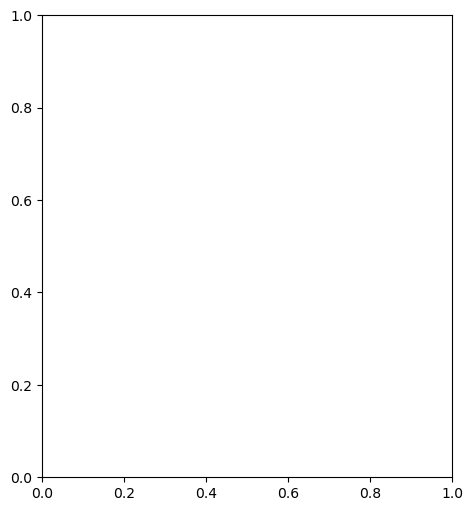

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Check the column names to ensure they match
print(df.columns)

# Filter the DataFrame for companies that have adopted AI technologies
adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'Yes']

# Filter the DataFrame for companies that have not adopted AI technologies
not_adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'No']

# Compare the business performance ratings of companies that have adopted AI vs. those that have not
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='How would you rate the impact of AI adoption on your organization\'s operational efficiency?', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='How would you rate the impact of AI adoption on your organization\'s operational efficiency?', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Impact on Efficiency')

plt.subplot(1, 3, 2)
sns.boxplot(y='To what extent has AI adoption influenced your organization\'s decision-making processes?', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='To what extent has AI adoption influenced your organization\'s decision-making processes?', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Influence on Decision Making')

plt.subplot(1, 3, 3)
sns.boxplot(y='To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Customer Satisfaction Influence')

plt.tight_layout()
plt.show()


KeyError: 'y'

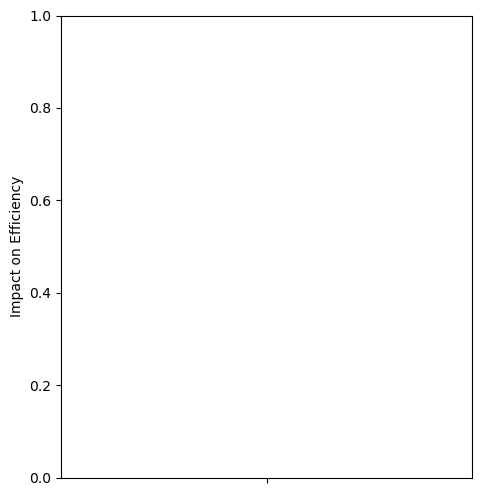

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Convert the 'How would you rate the impact of AI adoption on your organization\'s operational efficiency?' column to numeric
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')

# Filter the DataFrame for companies that have adopted AI technologies
adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'Yes']

# Filter the DataFrame for companies that have not adopted AI technologies
not_adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'No']

# Compare the business performance ratings of companies that have adopted AI vs. those that have not
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='Impact on Efficiency', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Impact on Efficiency', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Impact on Efficiency')

plt.subplot(1, 3, 2)
sns.boxplot(y='Influence on Decision Making', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Influence on Decision Making', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Influence on Decision Making')

plt.subplot(1, 3, 3)
sns.boxplot(y='Customer Satisfaction Influence', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Customer Satisfaction Influence', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Customer Satisfaction Influence')

plt.tight_layout()
plt.show()


KeyError: 'y'

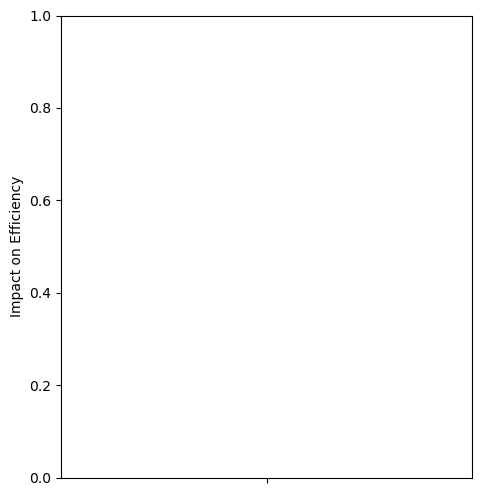

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Convert the 'How would you rate the impact of AI adoption on your organization\'s operational efficiency?' column to numeric
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')

# Filter the DataFrame for companies that have adopted AI technologies
adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'Yes']

# Filter the DataFrame for companies that have not adopted AI technologies
not_adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'No']

# Compare the business performance ratings of companies that have adopted AI vs. those that have not
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
if 'Impact on Efficiency' in not_adopted_ai_df.columns:
    sns.boxplot(y='Impact on Efficiency', data=adopted_ai_df, color='skyblue')
    sns.stripplot(y='Impact on Efficiency', data=not_adopted_ai_df, color='red', alpha=0.5)
    plt.title('Impact on Efficiency')

plt.subplot(1, 3, 2)
sns.boxplot(y='Influence on Decision Making', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Influence on Decision Making', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Influence on Decision Making')

plt.subplot(1, 3, 3)
sns.boxplot(y='Customer Satisfaction Influence', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Customer Satisfaction Influence', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Customer Satisfaction Influence')

plt.tight_layout()
plt.show()


KeyError: 'y'

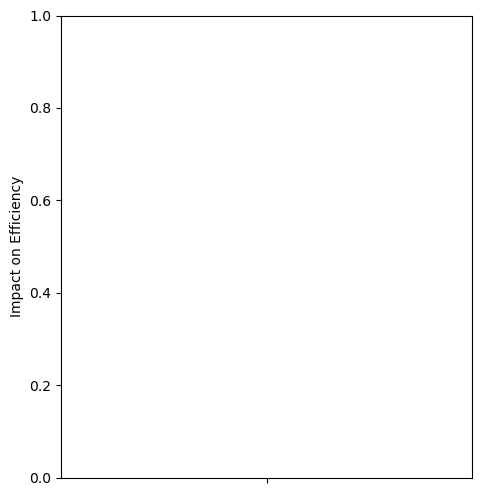

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Convert the 'How would you rate the impact of AI adoption on your organization\'s operational efficiency?' column to numeric
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')

# Filter the DataFrame for companies that have adopted AI technologies
adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'Yes']

# Filter the DataFrame for companies that have not adopted AI technologies
not_adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'No']

# Compare the business performance ratings of companies that have adopted AI vs. those that have not
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
if 'Impact on Efficiency' in not_adopted_ai_df.columns:
    sns.boxplot(y='Impact on Efficiency', data=adopted_ai_df, color='skyblue')
    sns.stripplot(y='Impact on Efficiency', data=not_adopted_ai_df, color='red', alpha=0.5)
    plt.title('Impact on Efficiency')

plt.subplot(1, 3, 2)
sns.boxplot(y='Influence on Decision Making', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Influence on Decision Making', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Influence on Decision Making')

plt.subplot(1, 3, 3)
sns.boxplot(y='Customer Satisfaction Influence', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Customer Satisfaction Influence', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Customer Satisfaction Influence')

plt.tight_layout()
plt.show()


KeyError: 'y'

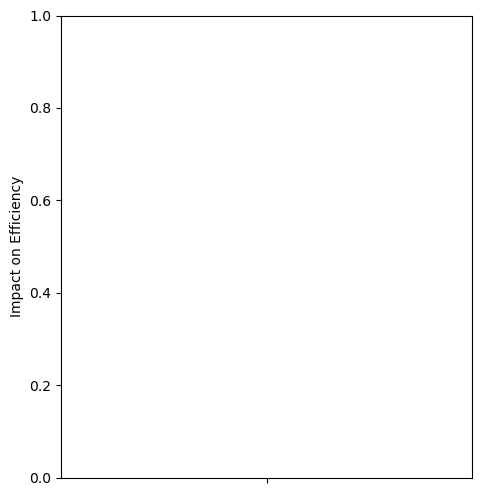

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'data1.csv'
df = pd.read_csv(file_path)

# Convert the 'How would you rate the impact of AI adoption on your organization\'s operational efficiency?' column to numeric
df['Impact on Efficiency'] = pd.to_numeric(df['How would you rate the impact of AI adoption on your organization\'s operational efficiency?'], errors='coerce')

# Filter the DataFrame for companies that have adopted AI technologies
adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'Yes']

# Filter the DataFrame for companies that have not adopted AI technologies
not_adopted_ai_df = df[df['Has your organization adopted AI technologies in its operations?'] == 'No']

# Compare the business performance ratings of companies that have adopted AI vs. those that have not
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
if 'Impact on Efficiency' in not_adopted_ai_df.columns:
    sns.boxplot(y='Impact on Efficiency', data=adopted_ai_df, color='skyblue')
    sns.stripplot(y='Impact on Efficiency', data=not_adopted_ai_df, color='red', alpha=0.5)
    plt.title('Impact on Efficiency')

plt.subplot(1, 3, 2)
sns.boxplot(y='Influence on Decision Making', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Influence on Decision Making', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Influence on Decision Making')

plt.subplot(1, 3, 3)
sns.boxplot(y='Customer Satisfaction Influence', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='Customer Satisfaction Influence', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Customer Satisfaction Influence')

plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame with the relevant data
# You may need to replace these column names with the actual ones in your DataFrame
adopted_ai_df = df[df['ai_adoption'] == 'Yes']
not_adopted_ai_df = df[df['ai_adoption'] == 'No']

# Create subplots for each performance metric
plt.figure(figsize=(18, 6))

# Plot 1: Impact on Efficiency
plt.subplot(1, 3, 1)
sns.boxplot(y='impact_operational_efficiency', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='impact_operational_efficiency', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Impact on Efficiency')

# Plot 2: Impact on Decision Making
plt.subplot(1, 3, 2)
sns.boxplot(y='impact_decision_making', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='impact_decision_making', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Impact on Decision Making')

# Plot 3: Impact on Competitive Advantage
plt.subplot(1, 3, 3)
sns.boxplot(y='impact_competitive_advantage', data=adopted_ai_df, color='skyblue')
sns.stripplot(y='impact_competitive_advantage', data=not_adopted_ai_df, color='red', alpha=0.5)
plt.title('Impact on Competitive Advantage')

plt.tight_layout()
plt.show()


KeyError: 'ai_adoption'

ValueError: Could not interpret input 'Have you observed any challenges or barriers to AI adoption within your organization?'

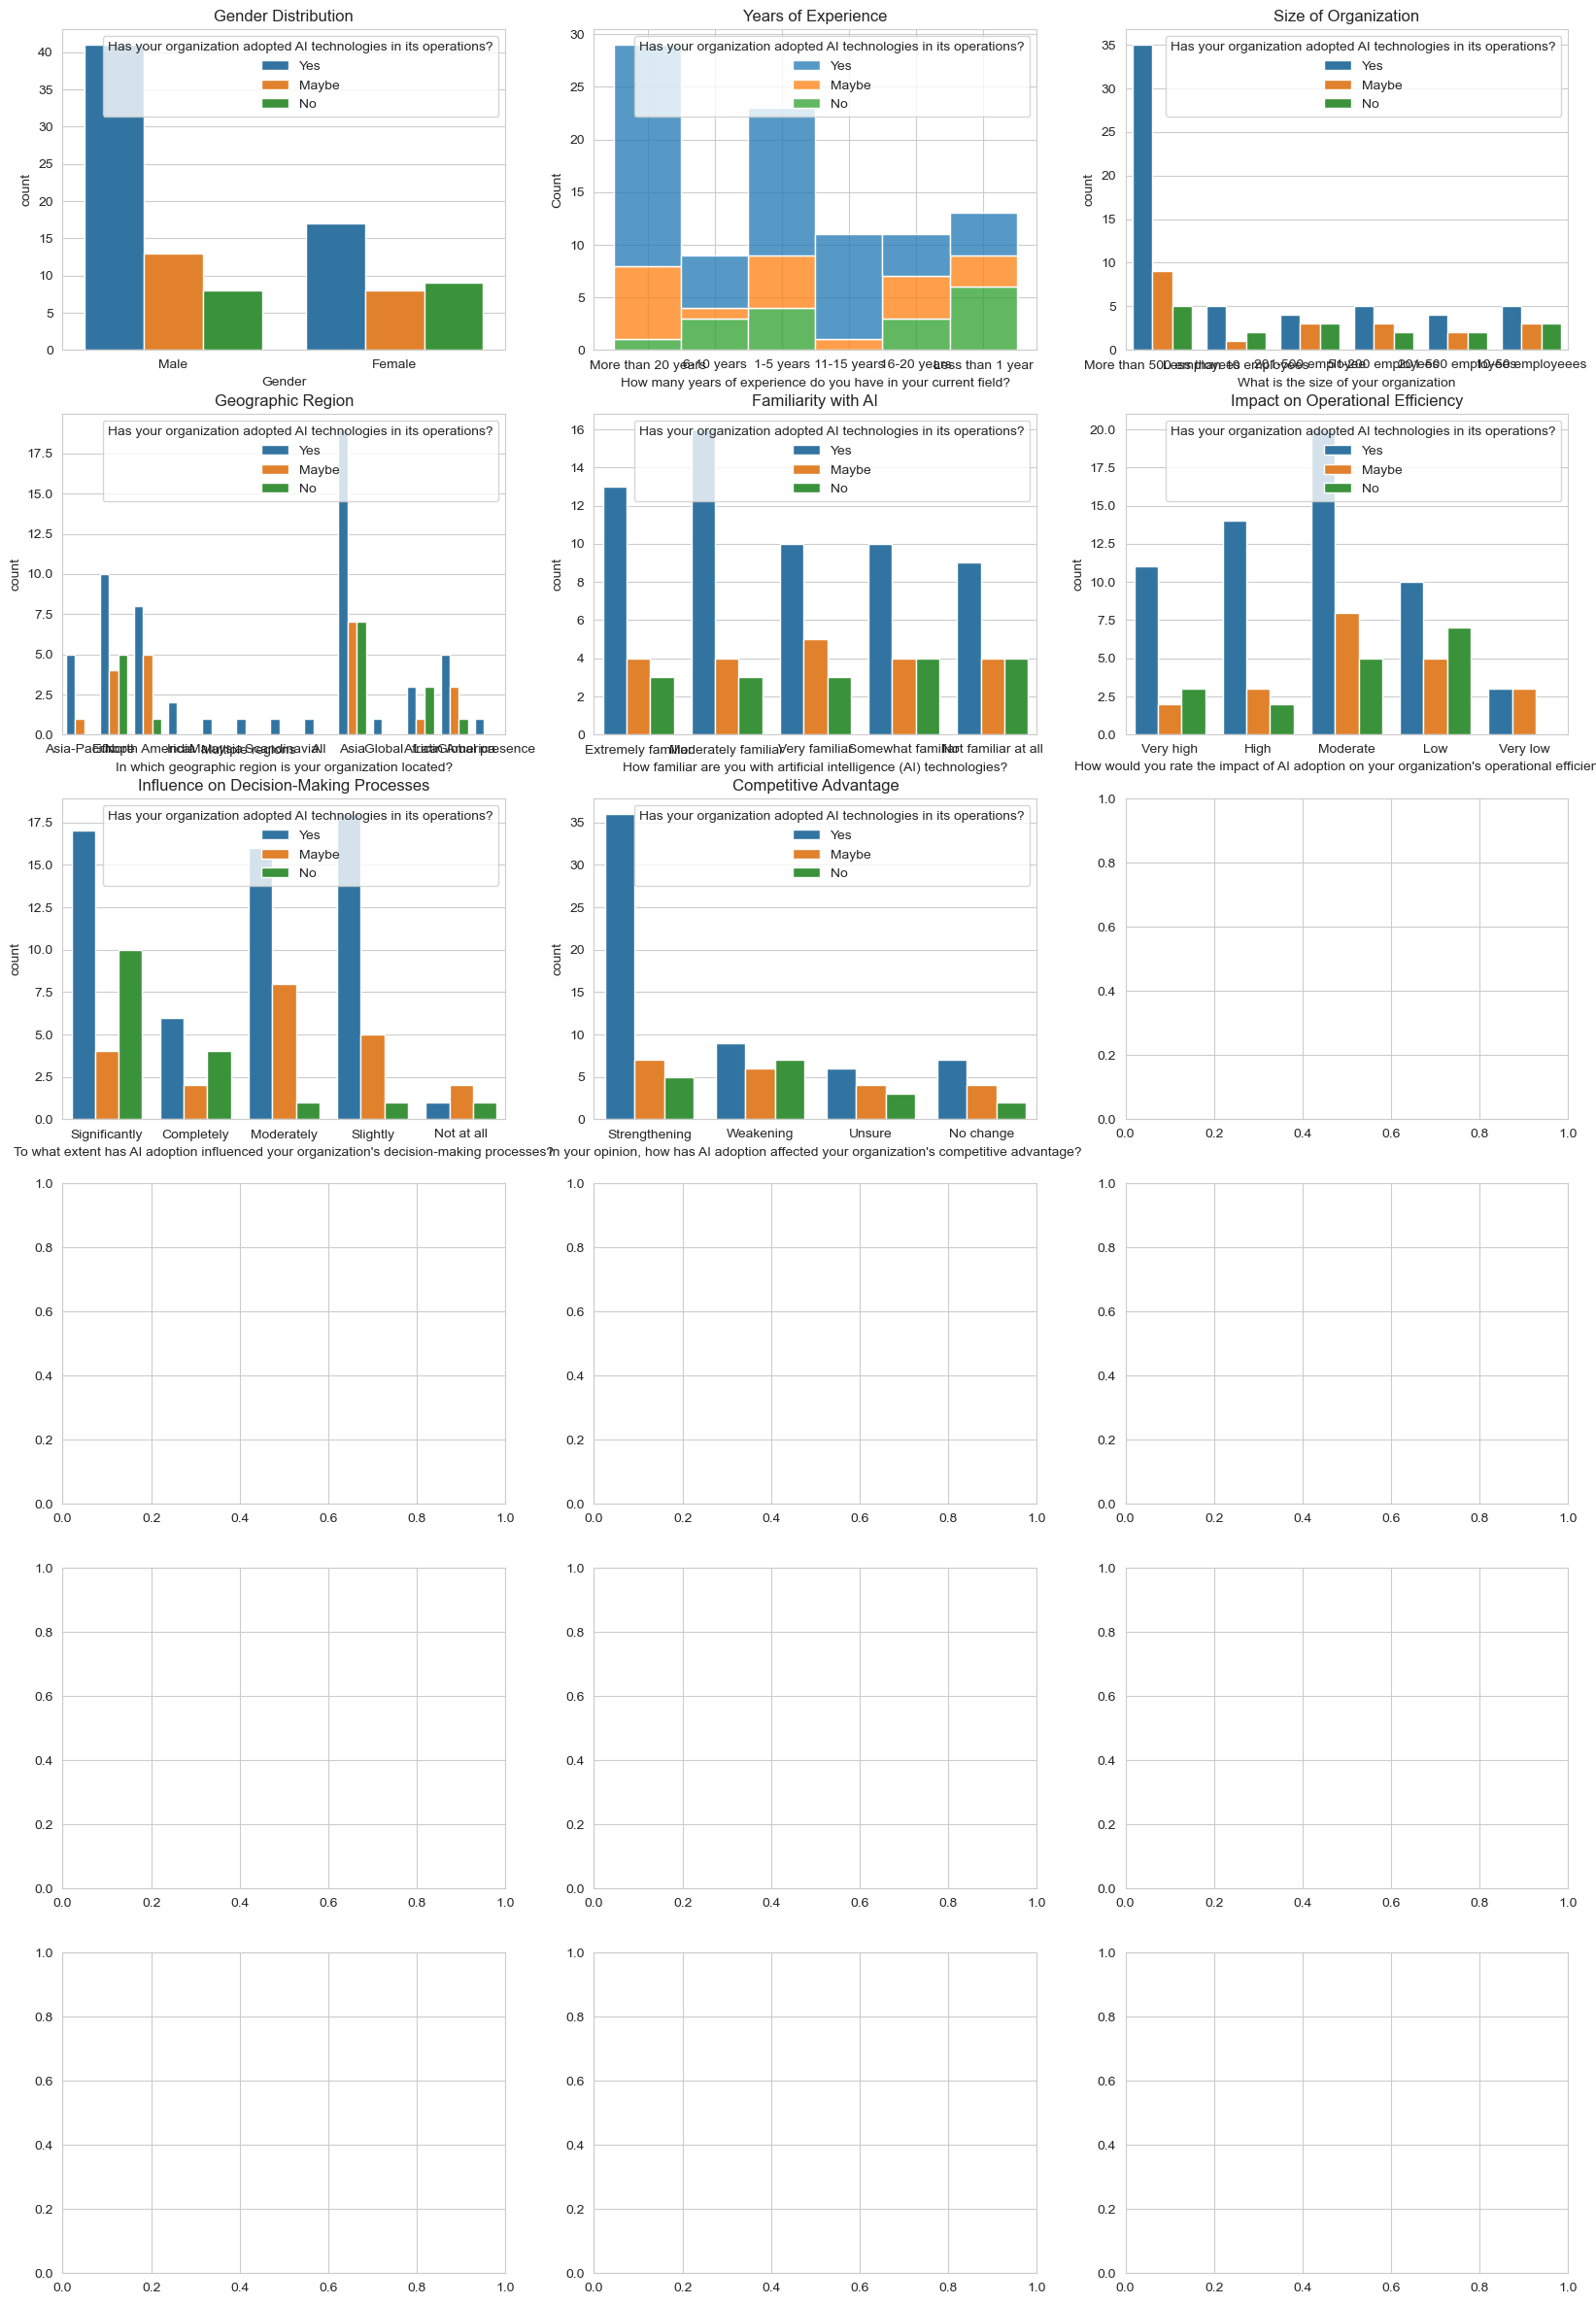

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data1.csv')

# Set the style of seaborn plots
sns.set_style('whitegrid')

# Create a figure to hold all the subplots
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

# Gender Distribution
sns.countplot(x='Gender', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Years of Experience
sns.histplot(x='How many years of experience do you have in your current field?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[0, 1], multiple="stack")
axes[0, 1].set_title('Years of Experience')

# Size of Organization
sns.countplot(x='What is the size of your organization', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Size of Organization')

# Geographic Region
sns.countplot(x='In which geographic region is your organization located?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Geographic Region')

# Familiarity with AI
sns.countplot(x='How familiar are you with artificial intelligence (AI) technologies?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Familiarity with AI')

# Impact on Operational Efficiency
sns.countplot(x='How would you rate the impact of AI adoption on your organization\'s operational efficiency?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Impact on Operational Efficiency')

# Influence on Decision-Making Processes
sns.countplot(x='To what extent has AI adoption influenced your organization\'s decision-making processes?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Influence on Decision-Making Processes')

# Competitive Advantage
sns.countplot(x='In your opinion, how has AI adoption affected your organization\'s competitive advantage?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Competitive Advantage')

# Challenges or Barriers
sns.countplot(x='Have you observed any challenges or barriers to AI adoption within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[2, 2])
axes[2, 2].set_title('Challenges or Barriers')

# Satisfaction with Outcomes
sns.countplot(x='How satisfied are you with the outcomes of AI adoption in your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[3, 0])
axes[3, 0].set_title('Satisfaction with Outcomes')

# Organizational Support and Leadership Commitment
sns.countplot(x='How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[3, 1])
axes[3, 1].set_title('Organizational Support and Leadership Commitment')

# Influence on Customer Satisfaction and Engagement
sns.countplot(x='To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[3, 2])
axes[3, 2].set_title('Influence on Customer Satisfaction and Engagement')

# AI Maturity
sns.countplot(x='How would you describe the overall level of AI maturity within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[4, 0])
axes[4, 0].set_title('AI Maturity')

# Impact on Job Roles and Workforce Dynamics
sns.countplot(x='How do you perceive the impact of AI adoption on job roles and workforce dynamics within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[4, 1])
axes[4, 1].set_title('Impact on Job Roles and Workforce Dynamics')

# Critical Factors for Successful Adoption
sns.countplot(x='What factors do you believe are most critical for ensuring the successful adoption and implementation of AI technologies within organizations?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[4, 2])
axes[4, 2].set_title('Critical Factors for Successful Adoption')

# Performance Improvements
sns.countplot(x='Have you noticed any specific areas where AI adoption has led to performance improvements within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[5, 0])
axes[5, 0].set_title('Performance Improvements')

# Benefits of AI Adoption
sns.countplot(x='What are the most significant benefits of AI adoption for businesses in your industry?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[5, 1])
axes[5, 1].set_title('Benefits of AI Adoption')

# Likelihood to Recommend AI Adoption
sns.countplot(x='How likely are you to recommend AI adoption to other organizations within your industry?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[5, 2])
axes[5, 2].set_title('Likelihood to Recommend AI Adoption')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25924\1215470872.py:78: UserWarning: Glyph 9729 (\N{CLOUD}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25924\1215470872.py:78: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_25924\1215470872.py:78: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9729 (\N{CLOUD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


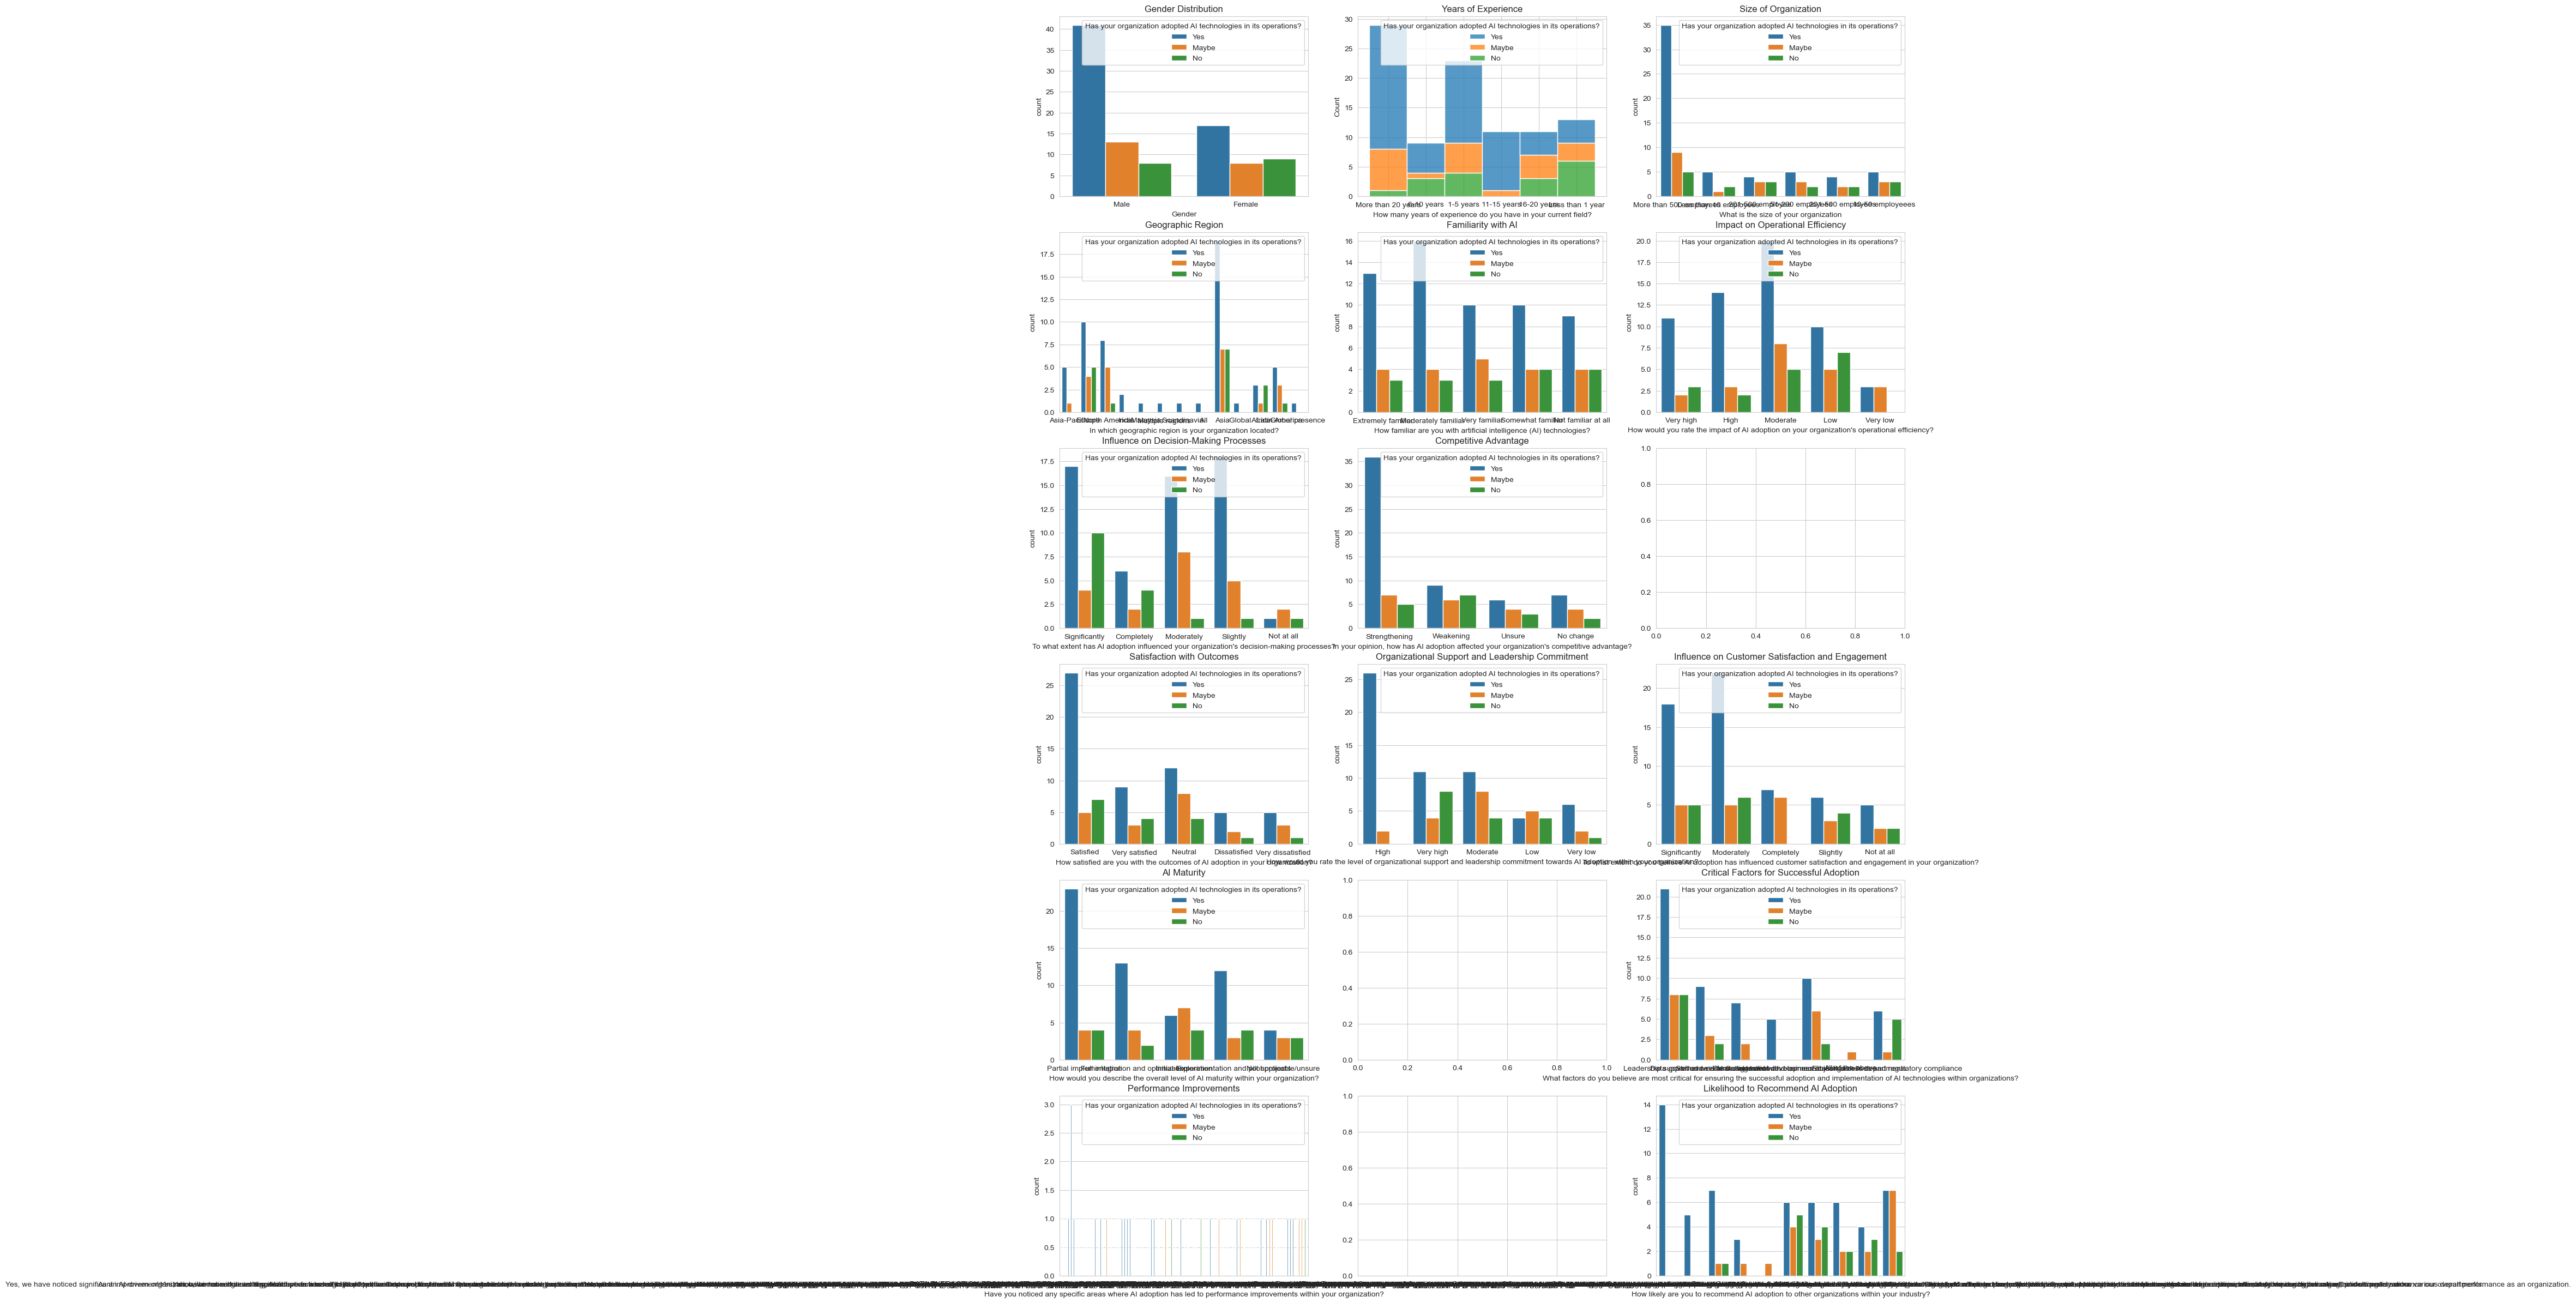

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data1.csv')

# Set the style of seaborn plots
sns.set_style('whitegrid')

# Create a figure to hold all the subplots
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

# Gender Distribution
sns.countplot(x='Gender', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Years of Experience
sns.histplot(x='How many years of experience do you have in your current field?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[0, 1], multiple="stack")
axes[0, 1].set_title('Years of Experience')

# Size of Organization
sns.countplot(x='What is the size of your organization', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Size of Organization')

# Geographic Region
sns.countplot(x='In which geographic region is your organization located?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Geographic Region')

# Familiarity with AI
sns.countplot(x='How familiar are you with artificial intelligence (AI) technologies?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Familiarity with AI')

# Impact on Operational Efficiency
sns.countplot(x='How would you rate the impact of AI adoption on your organization\'s operational efficiency?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Impact on Operational Efficiency')

# Influence on Decision-Making Processes
sns.countplot(x='To what extent has AI adoption influenced your organization\'s decision-making processes?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Influence on Decision-Making Processes')

# Competitive Advantage
sns.countplot(x='In your opinion, how has AI adoption affected your organization\'s competitive advantage?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Competitive Advantage')

# Satisfaction with Outcomes
sns.countplot(x='How satisfied are you with the outcomes of AI adoption in your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[3, 0])
axes[3, 0].set_title('Satisfaction with Outcomes')

# Organizational Support and Leadership Commitment
sns.countplot(x='How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[3, 1])
axes[3, 1].set_title('Organizational Support and Leadership Commitment')

# Influence on Customer Satisfaction and Engagement
sns.countplot(x='To what extent do you believe AI adoption has influenced customer satisfaction and engagement in your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[3, 2])
axes[3, 2].set_title('Influence on Customer Satisfaction and Engagement')

# AI Maturity
sns.countplot(x='How would you describe the overall level of AI maturity within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[4, 0])
axes[4, 0].set_title('AI Maturity')


# Critical Factors for Successful Adoption
sns.countplot(x='What factors do you believe are most critical for ensuring the successful adoption and implementation of AI technologies within organizations?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[4, 2])
axes[4, 2].set_title('Critical Factors for Successful Adoption')

# Performance Improvements
sns.countplot(x='Have you noticed any specific areas where AI adoption has led to performance improvements within your organization?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[5, 0])
axes[5, 0].set_title('Performance Improvements')



# Likelihood to Recommend AI Adoption
sns.countplot(x='How likely are you to recommend AI adoption to other organizations within your industry?', hue='Has your organization adopted AI technologies in its operations?', data=data, ax=axes[5, 2])
axes[5, 2].set_title('Likelihood to Recommend AI Adoption')

# Adjust layout
plt.tight_layout()
plt.show()


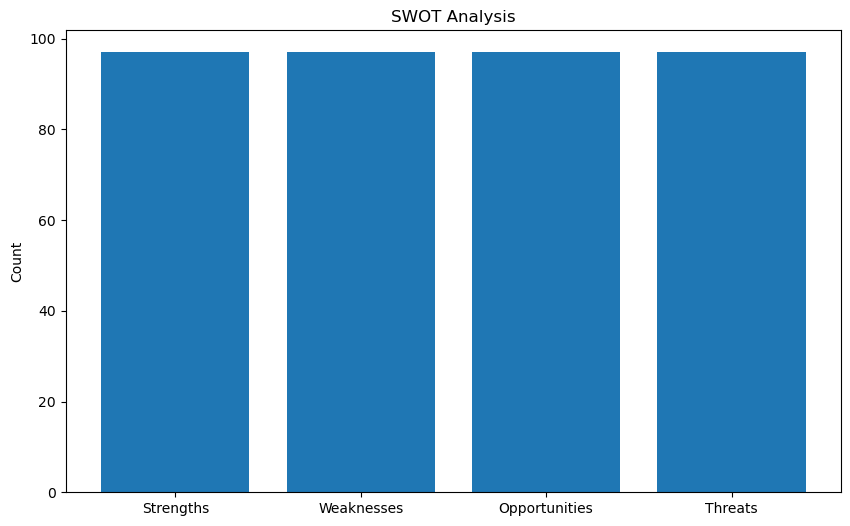

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data1.csv')

strengths = data[['Name', 'Organization Name', 'How familiar are you with artificial intelligence (AI) technologies?', 
                  'Which domain do you work in?', 'Has your organization adopted AI technologies in its operations?', 
                  'How would you rate the impact of AI adoption on your organization\'s operational efficiency?', 
                  'To what extent has AI adoption influenced your organization\'s decision-making processes?', 
                  'In your opinion, how has AI adoption affected your organization\'s competitive advantage?']]

weaknesses = data[['Name', 'Organization Name', 'Have you observed any challenges or barriers to AI adoption within your organization? (Select all that apply)', 
                   'How satisfied are you with the outcomes of AI adoption in your organization?', 
                   'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?', 
                    
                   'What factors do you believe are most critical for ensuring the successful adoption and implementation of AI technologies within organizations?']]

opportunities = data[['Name', 'Organization Name', 'Have you noticed any specific areas where AI adoption has led to performance improvements within your organization?', 
                      'In your opinion, what are the most significant benefits of AI adoption for businesses in your industry?']]

threats = data[['Name', 'Organization Name', 'Have you observed any challenges or barriers to AI adoption within your organization? (Select all that apply)', 
                'How satisfied are you with the outcomes of AI adoption in your organization?', 
                'How would you rate the level of organizational support and leadership commitment towards AI adoption within your organization?', 
                'What factors do you believe are most critical for ensuring the successful adoption and implementation of AI technologies within organizations?']]

# Analyze the data (you can add more analysis here based on your specific requirements)

# Visualize the results
strengths_count = strengths.count()[0]
weaknesses_count = weaknesses.count()[0]
opportunities_count = opportunities.count()[0]
threats_count = threats.count()[0]

plt.figure(figsize=(10, 6))
plt.bar(['Strengths', 'Weaknesses', 'Opportunities', 'Threats'], [strengths_count, weaknesses_count, opportunities_count, threats_count])
plt.ylabel('Count')
plt.title('SWOT Analysis')
plt.show()
